This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [118]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.special import comb
from scipy.stats import shapiro, levene, fligner, ttest_ind

import itertools
import matplotlib.pyplot as plt

In [9]:
def wilcox_test(data1, data2, n_bootstrap=10000, ci=95, ci_option='two-sided'):
    np.random.seed(42)  # Ensure reproducibility
    median_diffs = []
    
    # Bootstrap sampling for median differences
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        median_diff = np.median(sample1) - np.median(sample2)
        median_diffs.append(median_diff)
    
    # Calculate confidence interval based on the selected option
    if ci_option == 'two-sided':
        lower_percentile = (100 - ci) / 2
        upper_percentile = 100 - lower_percentile
        confidence_interval = np.percentile(median_diffs, [lower_percentile, upper_percentile])
    elif ci_option == 'lower':
        upper_percentile = ci
        confidence_interval = [-np.inf, np.percentile(median_diffs, upper_percentile)]
    elif ci_option == 'upper':
        lower_percentile = 100 - ci
        confidence_interval = [np.percentile(median_diffs, lower_percentile), np.inf]
    
    # Perform Mann-Whitney U test
    u_statistic, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    
    # Calculate actual median difference
    actual_median_diff = np.median(data1) - np.median(data2)
    
    # Print summary
    ci_text = f"{confidence_interval[0]:.6e} to {confidence_interval[1]:.6e}" if ci_option == 'two-sided' else confidence_interval[1] if ci_option == 'lower' else confidence_interval[0]
    summary = f"""W = {u_statistic}, p-value = {p_value:.5f}
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
{ci_text}
sample estimates:
difference in location
{actual_median_diff}"""
    
    print(summary)

# Example usage with the provided data setup
data1 = np.array([0.59, 0.87, 1.10, 1.10, 1.20, 1.30, 1.60, 1.70, 3.20, 4.00])
data2 = np.array([0.30, 0.36, 0.50, 0.70, 0.70, 0.90, 0.92, 1.00, 1.30, 9.70])

# To use this function, simply call it with your data and specify the desired confidence interval option
# For example:
wilcox_test(data1, data2, ci_option='lower')


W = 76.5, p-value = 0.04911
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
1.0200000000000002
sample estimates:
difference in location
0.44999999999999996


In [10]:

# Calculate the value of "20 choose 10"
choose_result = comb(20, 10, exact=True)  # 'exact=True' returns an exact integer

choose_result

184756

In [11]:
import itertools

# Define a set of 20 items (for demonstration, using numbers 1 through 20)
items = list(range(1, 21))

# Generate all combinations of choosing 10 items from the set of 20
combinations = list(itertools.combinations(items, 10))

# Now, combinations is a list of tuples, where each tuple is one combination of 10 items

# Example: Print the first 5 combinations to see what they look like
for combo in combinations[:5]:
    print(combo)


(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 13)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 14)


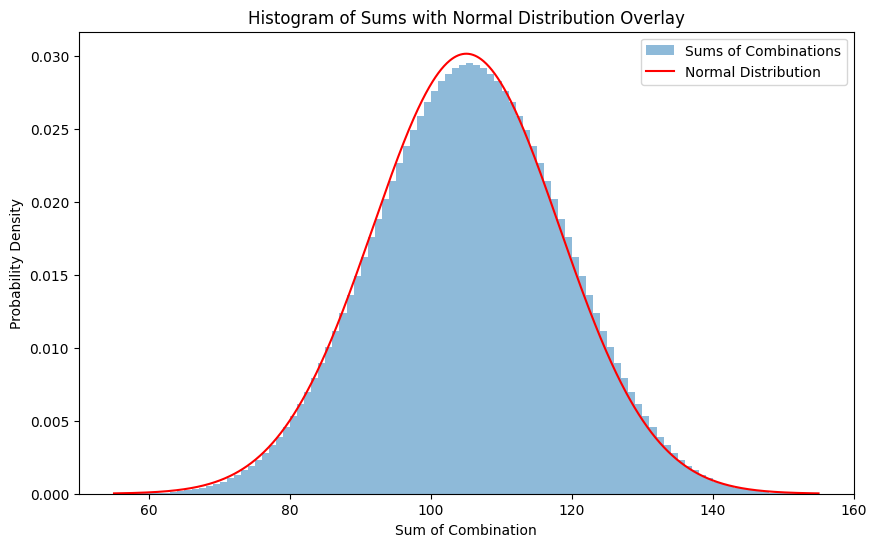

In [21]:
n = 10  # Number of items chosen
N = 20  # Total number of items
m = 10  # Also 10 in this context, but kept as a variable for clarity

u = n * (N + 1) / 2
variance = n * m * (N + 1) / 12
std = variance**0.5

# Generate all combinations
combinations = list(itertools.combinations(range(1, N+1), n))

# Calculate the sum of each combination
sums = [sum(combo) for combo in combinations]

plt.figure(figsize=(10, 6))
# Plot histogram of the sums
plt.hist(sums, bins=100, alpha=0.5, density=True, label='Sums of Combinations')

# Fit and draw a normal distribution with the calculated mean and standard deviation
x = np.linspace(min(sums), max(sums), 1000)
y = scipy.stats.norm.pdf(x, u, std)

plt.plot(x, y, 'r-', label='Normal Distribution')

plt.legend()
plt.title('Histogram of Sums with Normal Distribution Overlay')
plt.xlabel('Sum of Combination')
plt.ylabel('Probability Density')
plt.show()

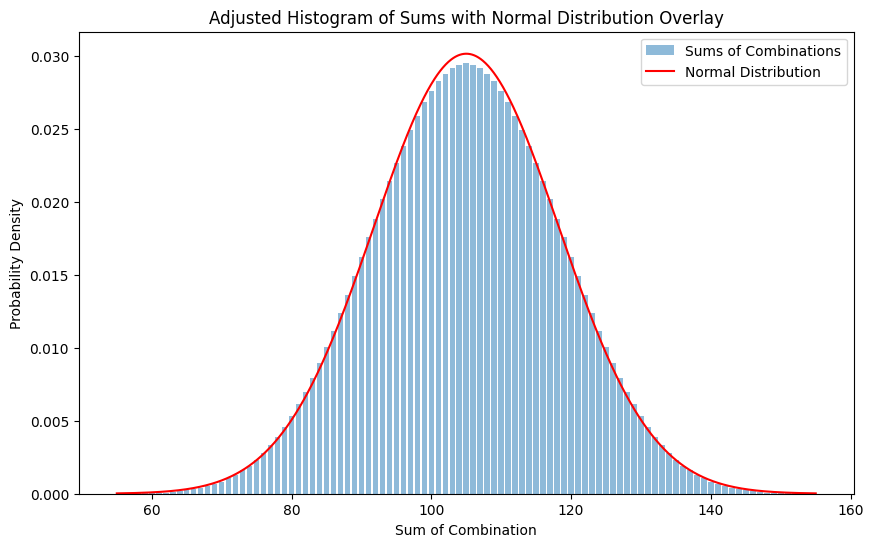

In [24]:
# Define bins such that they are centered on the integer sums
max_sum = max(sums)
min_sum = min(sums)
bins = np.arange(min_sum - 0.5, max_sum + 1.5, 1)  # Edges from just before the minimum to just after the maximum

plt.figure(figsize=(10, 6))
# Plot histogram with adjusted bins
plt.hist(sums, bins=bins, alpha=0.5, density=True, label='Sums of Combinations', rwidth=0.8)

# Generating points for the normal distribution overlay
x = np.linspace(min(sums), max(sums), 1000)
# Calculate the PDF of the normal distribution
y = scipy.stats.norm.pdf(x, u, std)

plt.plot(x, y, 'r-', label='Normal Distribution')

plt.legend()
plt.title('Adjusted Histogram of Sums with Normal Distribution Overlay')
plt.xlabel('Sum of Combination')
plt.ylabel('Probability Density')

plt.show()

#### HW#7 #1 Apply Eq.(4) for the tie correction for the standard deviation of the large-sample test statistic σ_W (see w07 pdf file eq. (4)), and calcuate σ_W for the follwoing data.
#### compare the σ_W with and without tie correction.

In [28]:
from scipy.stats import rankdata
# Example data with ties
data1 = [1, 2, 4, 4, 5]  # Group 1
data2 = [3, 4, 6, 7, 8]  # Group 2

# Pool the data and compute ranks
pooled_data = np.concatenate([data1, data2])
ranks = rankdata(pooled_data)

# Sizes of the groups
n = len(data1)
m = len(data2)
N = n + m

# Compute the standard devation of σ_W
sigma_w = ?? 
# Compute the corrected standard deviation σ_Wt
corrected_sigma_wt = ??

sigma_w, corrected_sigma_wt

(4.7871355387816905, 9.113058734923904)

#### Example 1

In [43]:
from scipy.stats import mannwhitneyu
# Hypothetical scores for two groups of students
group_a_scores = np.array([75, 80, 68, 90, 85, 78])
group_b_scores = np.array([85, 90, 88, 94, 87, 91])

### Example: Two-sided Test

A two-sided test is used when we want to know if there's any difference between the two groups, regardless of the direction of the difference.

In [44]:
u_statistic, p_value = mannwhitneyu(group_a_scores, group_b_scores, alternative='two-sided')
print(f"Two-sided test: U statistic = {u_statistic}, p-value = {p_value}")

Two-sided test: U statistic = 4.0, p-value = 0.030057756930680038


### Example: Lower Test (One-sided)

A lower test (one-sided) is used when our hypothesis is that Group A has lower scores than Group B.

In [45]:
u_statistic, p_value = mannwhitneyu(group_a_scores, group_b_scores, alternative='less')
print(f"Lower test (one-sided): U statistic = {u_statistic}, p-value = {p_value}")

Lower test (one-sided): U statistic = 4.0, p-value = 0.015028878465340019


### Example: Upper Test (One-sided)

An upper test (one-sided) is used when our hypothesis is that Group A has higher scores than Group B.

In [48]:
u_statistic, p_value = mannwhitneyu(group_a_scores, group_b_scores, alternative='greater')
print(f"Upper test (one-sided): U statistic = {u_statistic}, p-value = {p_value}")

Upper test (one-sided): U statistic = 4.0, p-value = 0.9900974382709439


### Interpretation of a High P-value (e.g., 0.99) in an Upper Test:

    Lack of Evidence Against Null Hypothesis: The high p-value indicates that there is insufficient evidence to reject the null hypothesis. In the context of an upper test, the null hypothesis typically states that the median of Group A is less than or equal to the median of Group B. A p-value of 0.99 suggests that the observed data are very consistent with the null hypothesis.

    Group A Not Statistically Higher: Specifically, for the upper test, a p-value of 0.99 suggests that there is not enough statistical evidence to support the claim that Group A has a higher median than Group B. In fact, such a high p-value indicates that it's very likely to observe the test statistic under the null hypothesis; thus, the data do not provide strong evidence that Group A outperforms Group B.

    Statistical Significance Not Achieved: Since the p-value exceeds common significance levels (e.g., 0.05, 0.01), we fail to achieve statistical significance, and the test does not provide evidence to conclude that Group A's scores are higher than Group B's based on the data.

### Example 2

In [50]:
# Constructing the DataFrame
data = {
    'Value': [0.59, 0.87, 1.10, 1.10, 1.20, 1.30, 1.60, 1.70, 3.20, 4.00, 0.30, 0.36, 0.50, 0.70, 0.70, 0.90, 0.92, 1.00, 1.30, 9.70],
    'Source': ['Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien']
}

df = pd.DataFrame(data)
df

,Index,Value,Source
0,0,0.59,Indust
1,1,0.87,Indust
2,2,1.10,Indust
3,3,1.10,Indust
4,4,1.20,Indust
5,5,1.30,Indust
6,6,1.60,Indust
7,7,1.70,Indust
8,8,3.20,Indust
9,9,4.00,Indust


In [92]:
data = {
    'Value': [0.59, 0.87, 1.10, 1.10, 1.20, 1.30, 1.60, 1.70, 3.20, 4.00, 0.30, 0.36, 0.50, 0.70, 0.70, 0.90, 0.92, 1.00, 1.30, 9.70],
    'Source': ['Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien']
}

# Create DataFrame
df = pd.DataFrame(data)

# Shuffle the "Source" column randomly
random_rearrangement = np.random.permutation(df['Source'])

# Update the "Source" column with the shuffled values
df['Random_Rearrangement'] = random_rearrangement

# Display DataFrame
print(df)

    Value    Source Random_Rearrangement
0    0.59    Indust             Residien
1    0.87    Indust             Residien
2    1.10    Indust               Indust
3    1.10    Indust               Indust
4    1.20    Indust               Indust
5    1.30    Indust               Indust
6    1.60    Indust             Residien
7    1.70    Indust               Indust
8    3.20    Indust             Residien
9    4.00    Indust             Residien
10   0.30  Residien               Indust
11   0.36  Residien               Indust
12   0.50  Residien               Indust
13   0.70  Residien             Residien
14   0.70  Residien             Residien
15   0.90  Residien             Residien
16   0.92  Residien               Indust
17   1.00  Residien             Residien
18   1.30  Residien               Indust
19   9.70  Residien             Residien


In [97]:
# Function to permute DataFrame based on a condition
def perm2(df, condition_column, condition_value):
    # Filter DataFrame based on the condition
    filtered_df = df[df[condition_column] == condition_value].copy()

    # Shuffle the filtered DataFrame
    shuffled_indices = np.random.permutation(len(filtered_df))
    shuffled_df = filtered_df.iloc[shuffled_indices]

    # Update the original DataFrame with the shuffled values
    df.loc[df[condition_column] == condition_value] = shuffled_df.values

# Permute the DataFrame where Source is 'Indust'
perm2(df, 'Source', 'Indust')
df

,Value,Source,Random_Rearrangement
0,0.59,Indust,Residien
1,1.10,Indust,Indust
2,1.20,Indust,Indust
3,1.30,Indust,Indust
4,0.87,Indust,Residien
5,1.10,Indust,Indust
6,1.70,Indust,Indust
7,1.60,Indust,Residien
8,3.20,Indust,Residien
9,4.00,Indust,Residien


Permutation Test of Difference Between 2 Group Means
Data: NH4orgN by where
Number of Possible Permutations is greater than 10000
R = 10000 p-value = 0.9955
Alt Hyp: true difference in means is not equal to 0
Sample estimates:
mean of Indust = 1.666, mean of Residien = 1.638
Diff of means = 0.028
95 percent confidence interval
-1.526 1.518


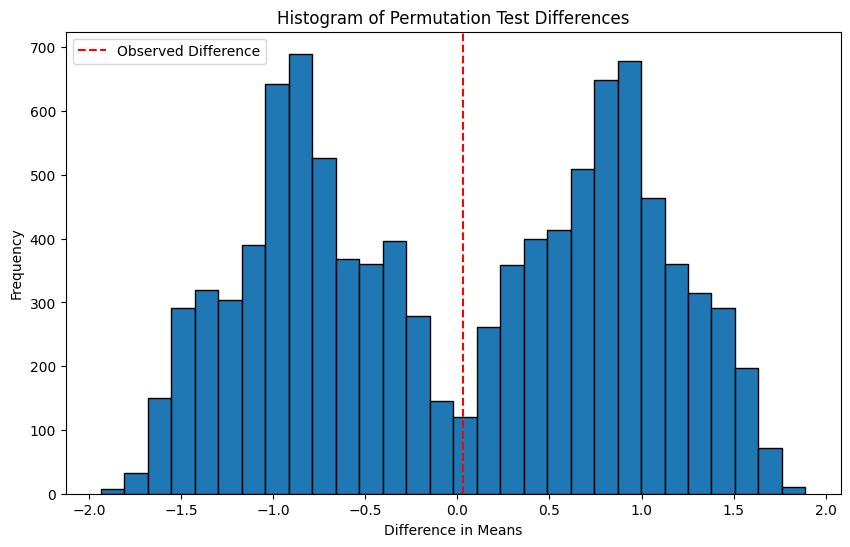

In [102]:
def permutation_test(df, source1, source2, R=10000, alpha=0.05):
    # Extract values for group1 and group2 based on sources
    group1 = df[df['Source'] == source1]['Value'].values
    group2 = df[df['Source'] == source2]['Value'].values
    
    # Calculate observed difference in means
    obs_diff = np.mean(group1) - np.mean(group2)
    
    # Combine the two groups
    combined = np.concatenate((group1, group2))
    
    # Initialize counter for permutations where difference >= observed difference
    count = 0
    
    # Perform permutation test
    for _ in range(R):
        np.random.shuffle(combined)  # Shuffle the combined array
        perm_group1 = combined[:len(group1)]  # Extract permuted group 1
        perm_group2 = combined[len(group1):]  # Extract permuted group 2
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)  # Calculate difference in means
        if np.abs(perm_diff) >= np.abs(obs_diff):
            count += 1
    
    # Calculate p-value
    p_value = count / R
    
    # Calculate confidence interval
    diffs = []
    for _ in range(R):
        np.random.shuffle(combined)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        diffs.append(perm_diff)
    diffs = np.array(diffs)
    conf_interval = np.percentile(diffs, [alpha / 2 * 100, (1 - alpha / 2) * 100])

        # Print results
    print("Permutation Test of Difference Between 2 Group Means")
    print(f"Data: NH4orgN by where")
    print(f"Number of Possible Permutations is greater than {R}")
    print(f"R = {R} p-value = {p_value:.4f}")
    print("Alt Hyp: true difference in means is not equal to 0")
    print("Sample estimates:")
    print(f"mean of {source1} = {np.mean(group1):.3f}, mean of {source2} = {np.mean(group2):.3f}")
    print(f"Diff of means = {obs_diff:.3f}")
    print("95 percent confidence interval")
    print(f"{conf_interval[0]:.3f} {conf_interval[1]:.3f}")

    
    plt.figure(figsize=(10, 6))
    # Plot histogram of calculated differences
    plt.hist(diffs, bins=30, edgecolor='black')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.title('Histogram of Permutation Test Differences')
    
    # Add horizontal line for observed difference
    plt.axvline(x=obs_diff, color='red', linestyle='--', label='Observed Difference')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

# Example DataFrame
data = {
    'Value': [0.59, 0.87, 1.10, 1.10, 1.20, 1.30, 1.60, 1.70, 3.20, 4.00, 0.30, 0.36, 0.50, 0.70, 0.70, 0.90, 0.92, 1.00, 1.30, 9.70],
    'Source': ['Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Indust', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien', 'Residien']
}
df = pd.DataFrame(data)

# Perform permutation test and plot histogram
permutation_test(df, 'Indust', 'Residien')

Permutation Test of Difference Between 2 Group Medians
Data: NH4orgN by where
Number of Possible Permutations is greater than 10000
R = 10000 p-value = 0.0696
Alt Hyp: true difference in medians is not equal to 0
Sample estimates:
median of Indust = 1.250, median of Residien = 0.800
Diff of medians = 0.450
95 percent confidence interval
-0.465 0.465


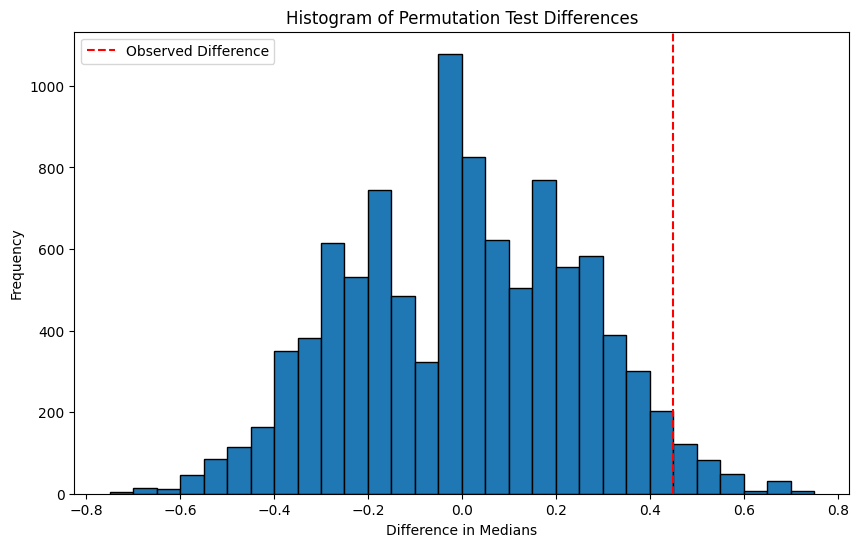

In [106]:
def permutation_test_median(df, source1, source2, R=10000, alpha=0.05):
    # Extract values for group1 and group2 based on sources
    group1 = df[df['Source'] == source1]['Value'].values
    group2 = df[df['Source'] == source2]['Value'].values
    
    # Calculate observed difference in medians
    obs_diff = np.median(group1) - np.median(group2)
    
    # Combine the two groups
    combined = np.concatenate((group1, group2))
    
    # Initialize counter for permutations where difference >= observed difference
    count = 0
    
    # Perform permutation test
    for _ in range(R):
        np.random.shuffle(combined)  # Shuffle the combined array
        perm_group1 = combined[:len(group1)]  # Extract permuted group 1
        perm_group2 = combined[len(group1):]  # Extract permuted group 2
        perm_diff = np.median(perm_group1) - np.median(perm_group2)  # Calculate difference in medians
        if np.abs(perm_diff) >= np.abs(obs_diff):
            count += 1
    
    # Calculate p-value
    p_value = count / R
    
    # Calculate confidence interval
    diffs = []
    for _ in range(R):
        np.random.shuffle(combined)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        perm_diff = np.median(perm_group1) - np.median(perm_group2)
        diffs.append(perm_diff)
    diffs = np.array(diffs)
    conf_interval = np.percentile(diffs, [alpha / 2 * 100, (1 - alpha / 2) * 100])

    # Print results
    print("Permutation Test of Difference Between 2 Group Medians")
    print(f"Data: NH4orgN by where")
    print(f"Number of Possible Permutations is greater than {R}")
    print(f"R = {R} p-value = {p_value:.4f}")
    print("Alt Hyp: true difference in medians is not equal to 0")
    print("Sample estimates:")
    print(f"median of {source1} = {np.median(group1):.3f}, median of {source2} = {np.median(group2):.3f}")
    print(f"Diff of medians = {obs_diff:.3f}")
    print("95 percent confidence interval")
    print(f"{conf_interval[0]:.3f} {conf_interval[1]:.3f}")

    # Plot histogram of calculated differences
    plt.figure(figsize=(10, 6))
    plt.hist(diffs, bins=30, edgecolor='black')
    plt.xlabel('Difference in Medians')
    plt.ylabel('Frequency')
    plt.title('Histogram of Permutation Test Differences')
    
    # Add horizontal line for observed difference
    plt.axvline(x=obs_diff, color='red', linestyle='--', label='Observed Difference')
    
    # Add legend
    plt.legend()
    
    # Show plot
    plt.show()

# Perform permutation test and plot histogram
permutation_test_median(df, 'Indust', 'Residien')

#### 3.3 Adjustment of the t-test for Unequal Variances

In [112]:
group1 = df[df['Source'] == 'Indust']['Value'].values
group2 = df[df['Source'] == 'Residien']['Value'].values

# Shapiro-Wilk test for Indust
stat_a, p_a = shapiro(group1)
print(f'Indust: Statistics={stat_a}, p={p_a}')

# Shapiro-Wilk test for Residien
stat_b, p_b = shapiro(group2)
print(f'Residien: Statistics={stat_b}, p={p_b}')

Indust: Statistics=0.8034604787826538, p=0.015972202643752098
Residien: Statistics=0.4675414562225342, p=1.517449732091336e-06


In [117]:
# Perform Levene's test
statistic, p_value = levene(group1, group2, center='median')
print("Levene's test statistic:", statistic)
print("p-value:", p_value)

# Perform Fligner-Killeen test
statistic, p_value = fligner(group1, group2)

print("Fligner-Killeen test statistic:", statistic)
print("p-value:", p_value)

Levene's test statistic: 0.2242391747820643
p-value: 0.6415212057122008
Fligner-Killeen test statistic: 0.06754838244965784
p-value: 0.7949403585559228


In [119]:
# Perform two-sample t-test
statistic, p_value = ttest_ind(group1, group2)

print("Two-sample t-test statistic:", statistic)
print("p-value:", p_value)

Two-sample t-test statistic: 0.029044191616409778
p-value: 0.9771489515202003


In [121]:
# Calculate sample means
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)

# Calculate confidence interval
n1 = len(group1)
n2 = len(group2)
df = n1 + n2 - 2
std_group1 = np.std(group1, ddof=1)
std_group2 = np.std(group2, ddof=1)
se_diff = np.sqrt((std_group1**2 / n1) + (std_group2**2 / n2))
margin_of_error = 1.96 * se_diff
ci_lower = mean_group1 - mean_group2 - margin_of_error
ci_upper = mean_group1 - mean_group2 + margin_of_error

# Print results
print("Alternative hypothesis: true difference in means is not equal to 0")
print("95 percent confidence interval:")
print(f"{ci_lower:.6f} {ci_upper:.6f}")
print("Sample estimates:")
print(f"mean in group Indust: {mean_group1:.3f}")
print(f"mean in group Residen: {mean_group2:.3f}")

Alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
-1.861534 1.917534
Sample estimates:
mean in group Indust: 1.666
mean in group Residen: 1.638


In [124]:
# Perform two-sample t-test
log_group1 = np.log(group1)
log_group2 = np.log(group2)
statistic, p_value = ttest_ind(log_group1, log_group2)

print("Two-sample t-test statistic:", statistic)
print("p-value:", p_value)

Two-sample t-test statistic: 1.3578475341640786
p-value: 0.19129131560459708


In [126]:
# Calculate sample means
mean_log_group1 = np.mean(log_group1)
mean_log_group2 = np.mean(log_group2)

# Calculate confidence interval
n1 = len(log_group1)
n2 = len(log_group2)
df = n1 + n2 - 2
std_log_group1 = np.std(log_group1, ddof=1)
std_log_group2 = np.std(log_group2, ddof=1)
se_diff = np.sqrt((std_log_group1**2 / n1) + (std_log_group2**2 / n2))
margin_of_error = 1.96 * se_diff
ci_lower = mean_group1 - mean_group2 - margin_of_error
ci_upper = mean_group1 - mean_group2 + margin_of_error

# Print results
print("Alternative hypothesis: true difference in means is not equal to 0")
print("95 percent confidence interval:")
print(f"{ci_lower:.6f} {ci_upper:.6f}")
print("Sample estimates:")
print(f"mean in group Indust: {mean_log_group1:.3f}")
print(f"mean in group Residen: {mean_log_group2:.3f}")

Alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
-0.665563 0.721563
Sample estimates:
mean in group Indust: 0.352
mean in group Residen: -0.129
